# Part 1
# Implementing Multivariate Linear Regression using Gradient Descent

**Importing necessary libraries and datasets**

In [1]:
import numpy as np
from sklearn import metrics, datasets,linear_model
from sklearn.preprocessing import StandardScaler

In [2]:
X,y = datasets.load_boston(return_X_y = True)
# X,y = datasets.load_diabetes(return_X_y = True)
X.shape

(506, 13)

**Dividing the data into training set and testing set**

In [3]:
X_train = X[0:400,:]

# create a temp array with all zeros of shape (400,14) for adding one extra column of ones
shape_tuple = (X_train.shape[0], X_train.shape[1] + 1);
X_temp = np.zeros(shape_tuple)
print(X_temp.shape)

# create a column vector of shape (400,1) containing all the ones for X0
column1 = np.ones(X_train.shape[0])
print(column1.shape)

# add this column as the first column of X_temp
X_temp[:,0] = column1;
print(X_temp)

# add the rest of the training data to it and finally assign it back to X_train
X_temp[:,1:] = X_train;
X_train = X_temp;
print(X_train.shape)


# getting our y_train vector
y_train = y[0:400]
print(y_train.shape)

(400, 14)
(400,)
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]
(400, 14)
(400,)


In [4]:
# remaining data will be our testing data

X_test = X[400:,:]
print(X_test.shape)

# create a temp array with all zeros of shape (400,14) for adding one extra column of ones
shape_tuple = (X_test.shape[0], X_test.shape[1] + 1);
X_temp = np.zeros(shape_tuple)

# create a column vector of shape (400,1) containing all the ones for X0
column1 = np.ones(X_test.shape[0])

# add this column as the first column of X_temp
X_temp[:,0] = column1;

# add the rest of the training data to it and finally assign it back to X_train
X_temp[:,1:] = X_test;
X_test = X_temp;
print(X_test.shape)

# getting our y_test vector
y_test = y[400:]
print(y_test.shape)

(106, 13)
(106, 14)
(106,)


**Performing feature scaling**

In [5]:
# initializing the theta vector with random uniform values between 0 and 1
# shape of theta is (14,1)
theta = np.random.uniform(0,1,X_train.shape[1])
print(theta)

# feature scaling the X_train data to bring the range of values of all columns in [0,1]
scaler = StandardScaler()

# ftting the data (i.e. finding out the mean and standard dev for normalization)
scaler.fit(X_train[:,1:])

# scaling the data and assigning it back to X_train and X_test
X_train[:,1:] = scaler.transform(X_train[:,1:])
X_test[:,1:] = scaler.transform(X_test[:,1:])

[0.64178649 0.86412813 0.75983585 0.31306369 0.86354682 0.95613656
 0.49222143 0.2776789  0.9573146  0.7944825  0.25754235 0.81103985
 0.47773532 0.46537789]


**Performing Gradient Descent**

In [6]:
epochs = 500
alpha = 0.01
m = X_train.shape[0]
n = X_train.shape[1]
j_history = np.zeros(epochs);
iterations = np.zeros(epochs);

for i in range(0,epochs+1):
#     calculating the hypothesis function/ y_predicted by dot product of X_train and theta
#     X_train.shape = (400,14), theta.shape = (14,1), thus h.shape = (400,1). 
#     This way we predict 400 values from the given data
    h = np.dot(X_train,theta)
    
#     calculating the error between the original and the predicted values
#     h.shape = y_train.shape = (400,1), error.shape = (400,1)
    error = h - y_train;
    
#     reducing theta by the formula theta = theta - (alpha/m) * sum(h(i)-y(i)).x(i)
#     X_train.shape = (400,14), error.shape(400,1), thus we take transpose of X_train to give theta.shape = (14,1)
    theta = theta - ((alpha/m) * (X_train.T.dot(error)))
    
    if (i != epochs):
        j_history[i] = (1/(2*m)) * np.sum((h-y_train)**2)
        iterations[i] = i
    
print("Theta vector: ", theta)
print("Theta shape: ", theta.shape)

Theta vector:  [24.18038415 -0.83866184  0.72780665 -0.15471083  0.62358641 -0.40622362
  3.94873249 -0.02883078 -1.86434103  1.57204932 -0.8848799  -1.48566906
  0.16698161 -3.42007027]
Theta shape:  (14,)


**Testing our model**

In [7]:
prediction = np.dot(X_test,theta)

print("MAE", metrics.mean_absolute_error(y_true=y_test,y_pred = prediction))
print("MSE", metrics.mean_squared_error(y_true=y_test,y_pred = prediction))

MAE 4.4781092957089035
MSE 29.51416944615524


**Checking convergence of cost function**

In [8]:
import matplotlib.pyplot as plt

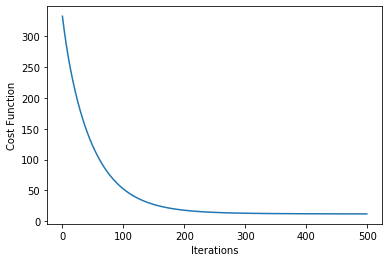

In [9]:
plt.xlabel("Iterations")
plt.ylabel("Cost Function")
plt.plot(iterations,j_history)

# Part 2
# Multivariate Linear Regression using Normal Equation

In [10]:
# implementing theta = (X'X)^-1(X'Y)

A = np.linalg.pinv(np.dot(X_train.T,X_train))
B = np.dot(X_train.T,y_train)

theta = np.dot(A,B)
theta

array([24.3345    , -1.14370921,  1.12191092,  0.35913222,  0.48497247,
       -1.7061696 ,  3.58169796,  0.07554815, -2.8156326 ,  3.05189603,
       -1.97502535, -1.7937352 , -0.05252128, -3.50239563])

**Testing our model**

In [11]:
prediction = np.dot(X_test,theta)

print("MAE", metrics.mean_absolute_error(y_true=y_test,y_pred = prediction))
print("MSE", metrics.mean_squared_error(y_true=y_test,y_pred = prediction))

MAE 5.14223221446533
MSE 37.89377859960243


# Additional Exercise
# Multivariate Linear Regression using Sklearn

In [12]:
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
print(diabetes_X.shape)

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[0:400,:]
diabetes_X_test = diabetes_X[400:,]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[0:400]
diabetes_y_test = diabetes_y[400:]

# Create linear regression object
regression = linear_model.LinearRegression()

# Train the model using the training sets
regression.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regression.predict(diabetes_X_test)

print('Mean squared error: {}'.format(metrics.mean_squared_error(diabetes_y_test, diabetes_y_pred)))

(442, 10)
Mean squared error: 1668.7496675899772
